**`PassengerId`** - A unique Id for each passenger. 

**`HomePlanet`** - The planet the passenger departed from, typically their planet of permanent residence.

**`CryoSleep`** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.

**`Cabin`** - The cabin number where the passenger is staying. 

**`Destination`** - The planet the passenger will be debarking to.

**`Age`** - The age of the passenger.

**`VIP`** - Whether the passenger has paid for special VIP service during the voyage.

**`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck`** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**`Name`** - The first and last names of the passenger.

**`Transported`** - Whether the passenger was transported to another dimension.

In [146]:
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
def outliers(df, n, cols):

  out_idx = []

  for col in cols:

    q1 = np.percentile(df[col], 25)

    q3 = np.percentile(df[col], 75)

    iqr = q3 - q1

    step = 1.5 * iqr

    lower_bound = q1 - step
    upper_bound = q3 + step

    out_list = df[(df[col] < lower_bound) & (df[col] > upper_bound)].index

    print(col, lower_bound, upper_bound)

    out_idx.extend(out_list)

  out_idx = Counter(out_idx)
  outliers = list((k for k, v in out_idx.items() if v > n))

  return outliers

In [100]:
train = pd.read_csv("./spaceship-titanic/train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [101]:
df = train.copy()

In [102]:
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isnull().sum()

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age             179
vip             203
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
name            200
transported       0
dtype: int64

In [6]:
for col in df.columns:
  print(f"{col} - {df[col].nunique()}")

passengerid - 8693
homeplanet - 3
cryosleep - 2
cabin - 6560
destination - 3
age - 80
vip - 2
roomservice - 1273
foodcourt - 1507
shoppingmall - 1115
spa - 1327
vrdeck - 1306
name - 8473
transported - 2


In [9]:
for col in df.select_dtypes(include=['object']).columns:
  if df[col].nunique() <= 5:
    print(f"{col}", end=":\n")
    print(f"{df[col].value_counts()}")
    print("\n")

homeplanet:
Earth     4602
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64


cryosleep:
False    5439
True     3037
Name: cryosleep, dtype: int64


destination:
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64


vip:
False    8291
True      199
Name: vip, dtype: int64




## EDA

In [10]:
df.describe()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [103]:
df.dropna(axis=0, inplace=True)

In [110]:
df.reset_index(inplace=True, drop=True)

In [111]:
df.isnull().sum()

passengerid     0
homeplanet      0
cryosleep       0
cabin           0
destination     0
age             0
vip             0
roomservice     0
foodcourt       0
shoppingmall    0
spa             0
vrdeck          0
name            0
transported     0
dtype: int64

### Home Planet

**Travel Destination per Home Planet**

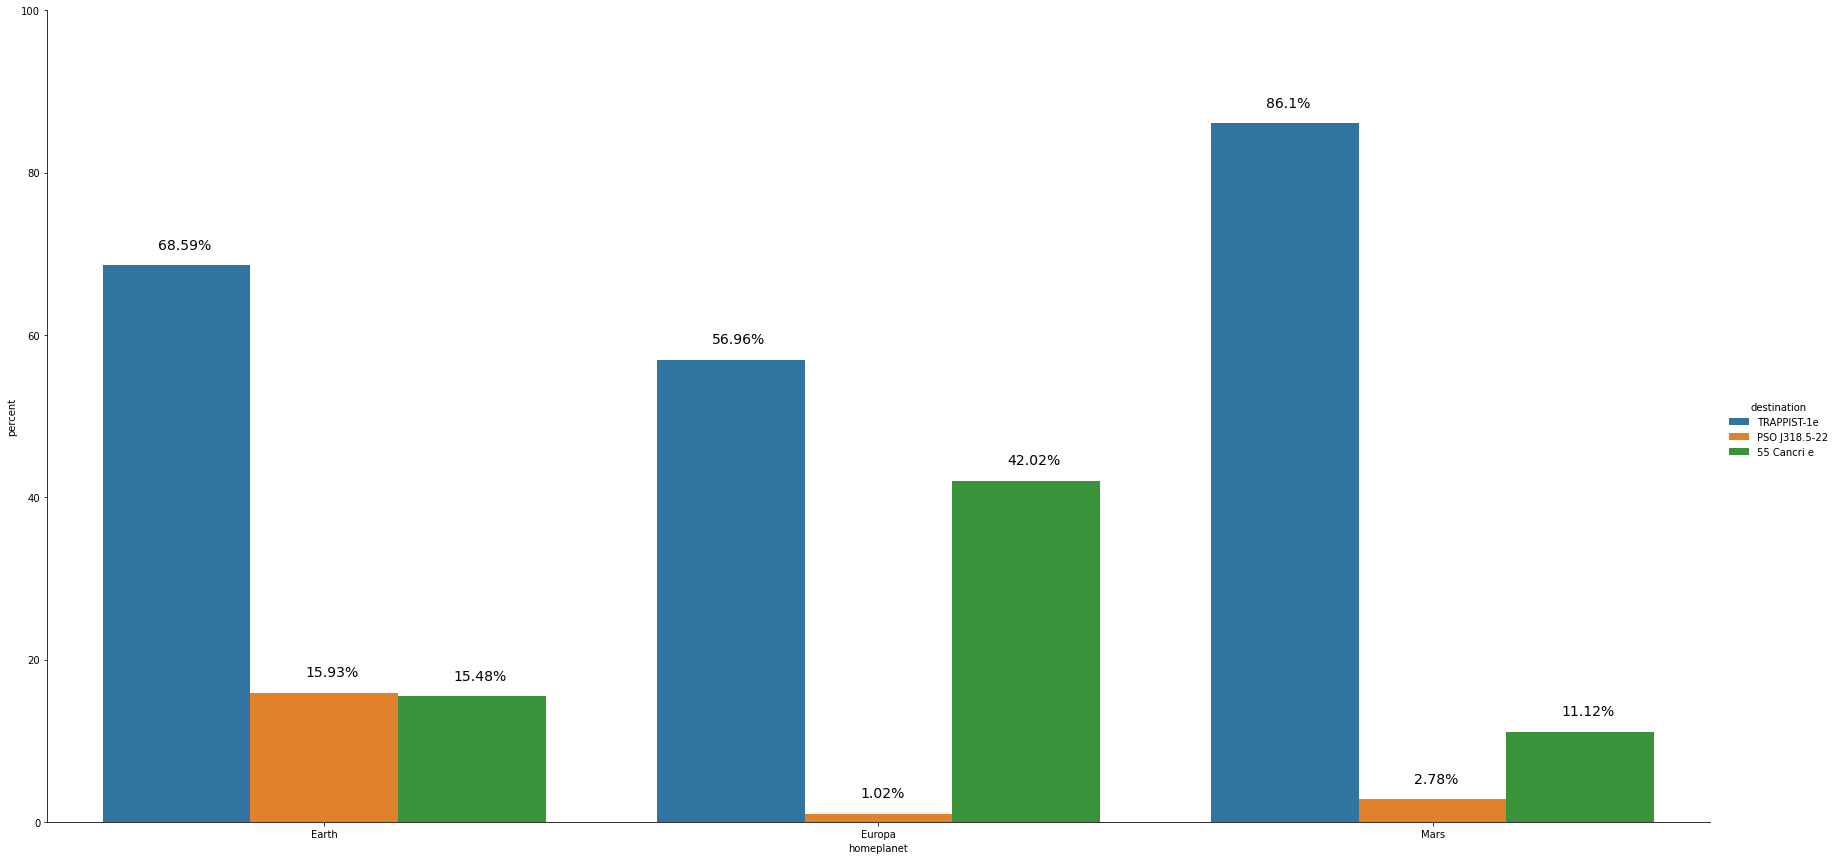

In [112]:
# plt.figure(figsize=(15, 12))
# sns.countplot(
#   x = df['homeplanet'],
#   hue="destination",
#   data = df
# )

# plt.title("Travel Destination per Home Planet")
# plt.ylabel("Number of people")
# plt.xlabel("Home Planet")

df_plot = df.groupby("homeplanet")['destination'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot

g = sns.catplot(
  x = "homeplanet",
  y='percent',
  hue='destination',
  data=df_plot,
  kind='bar',
  height=12,
  aspect = 2,
)

g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.1
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

**Number of People in Cryosleep based on Home Planet**

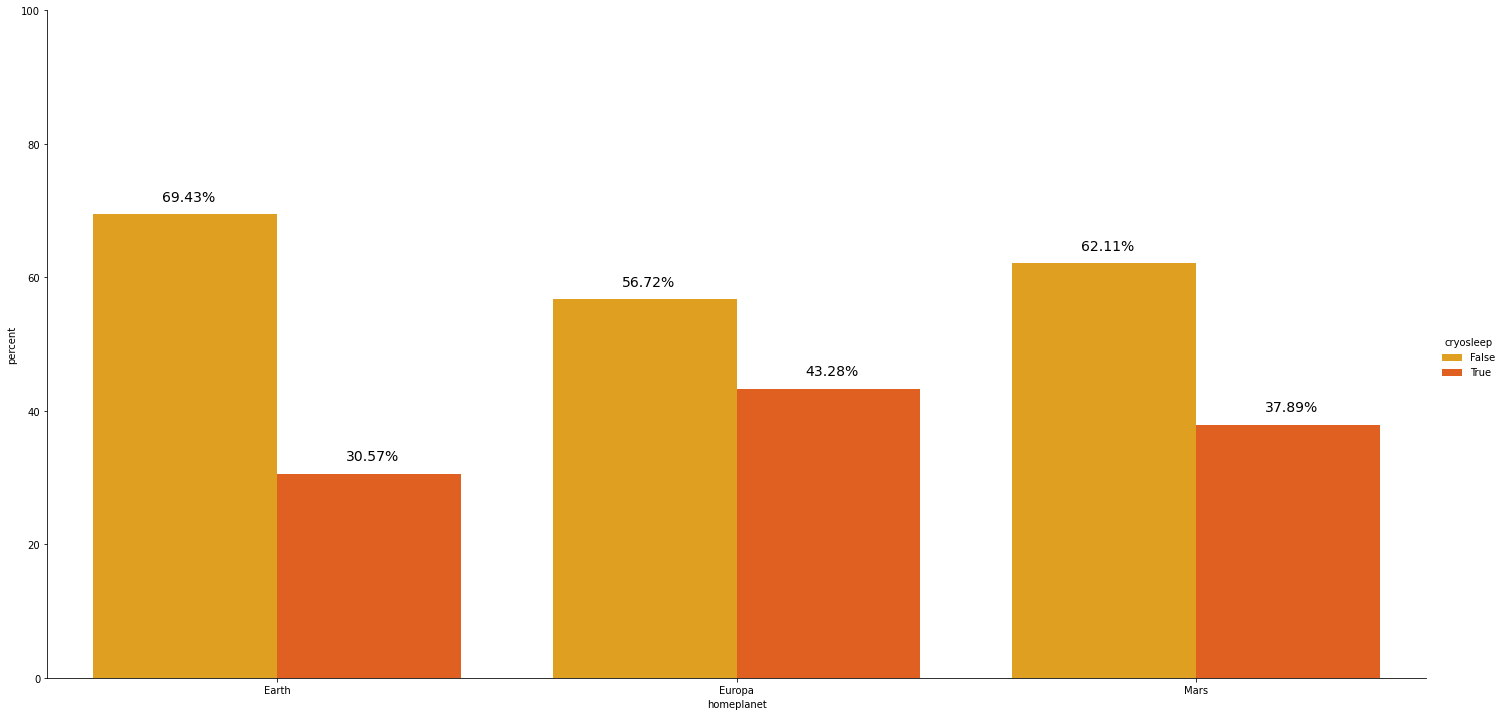

In [113]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("homeplanet")['cryosleep'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'homeplanet',
  y = "percent",
  hue = "cryosleep",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

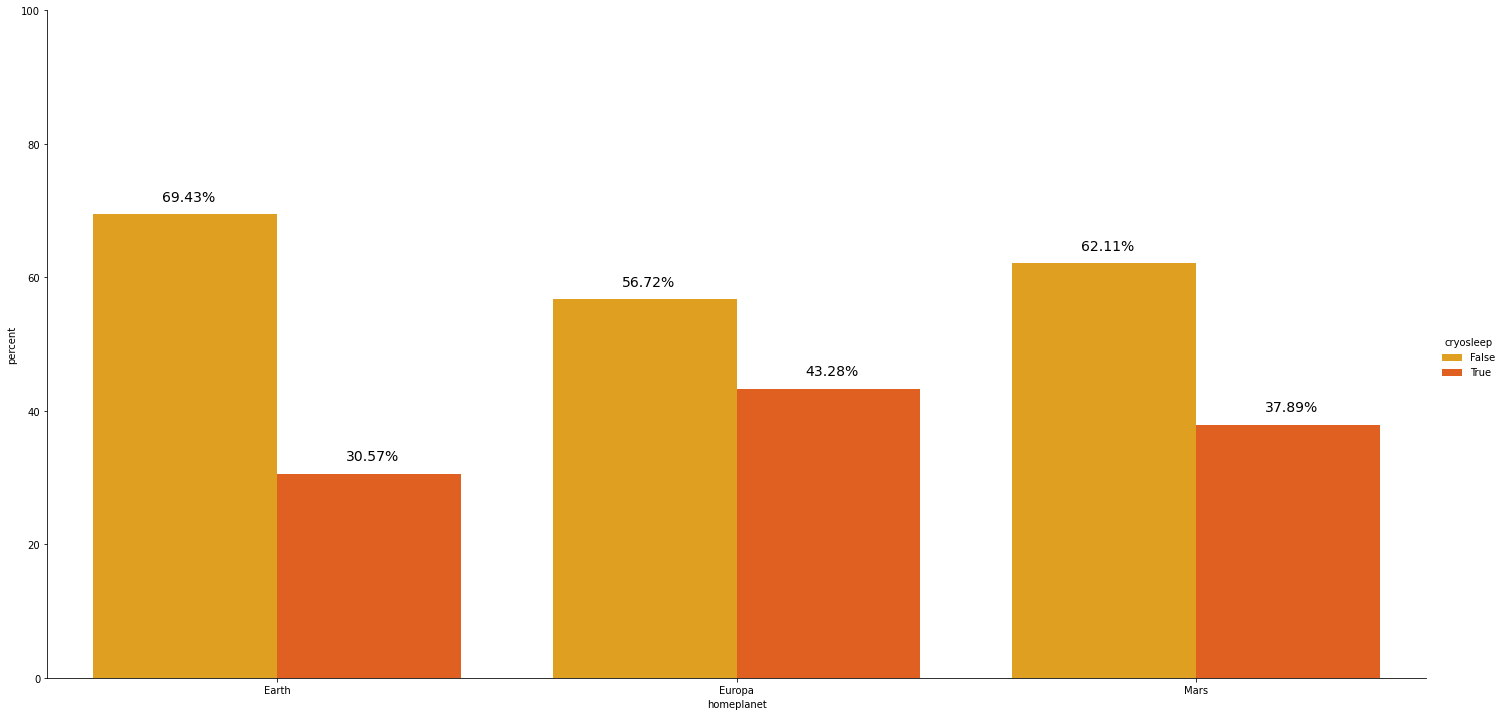

In [114]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("homeplanet")['cryosleep'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'homeplanet',
  y = "percent",
  hue = "cryosleep",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

/home/xviix/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


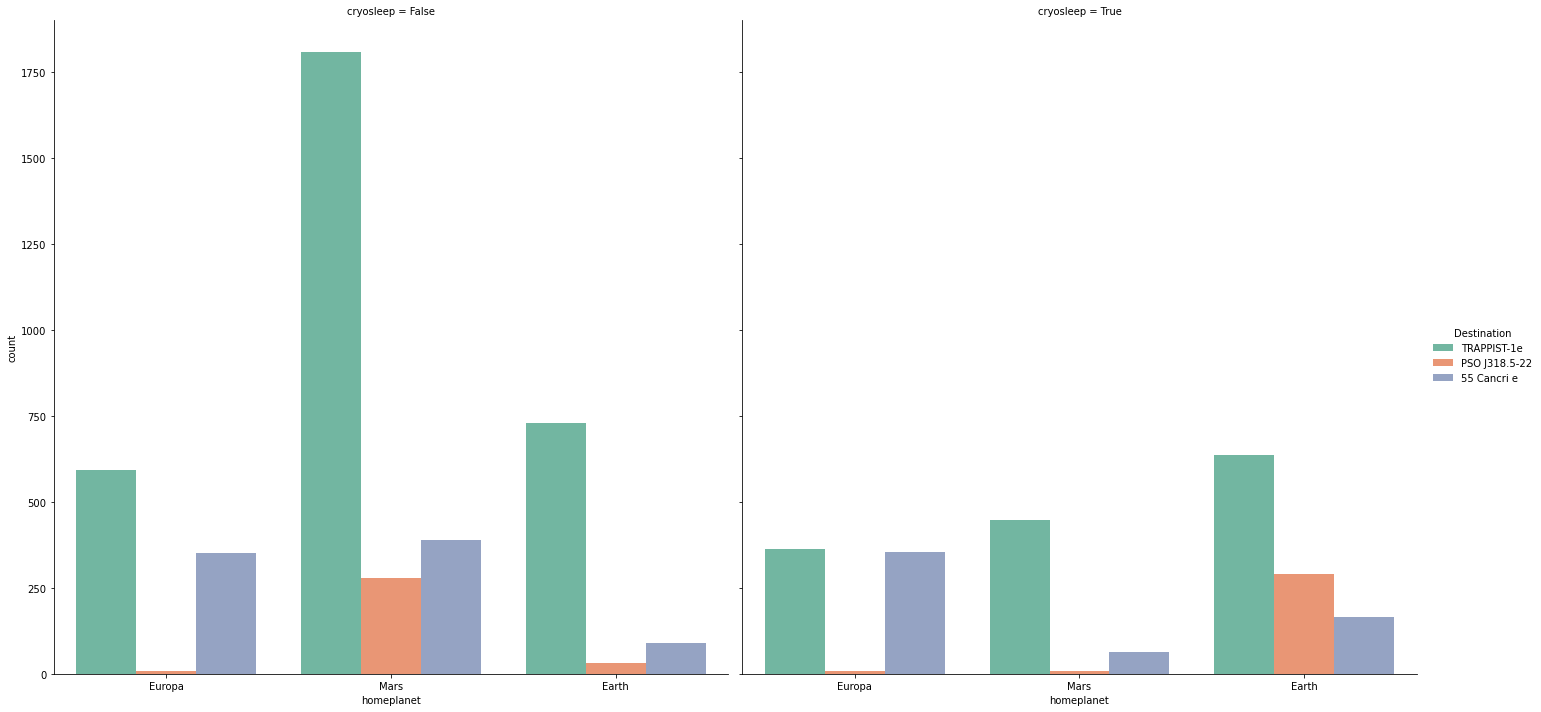

In [115]:
# plt.figure(figsize=(15, 12))
g = sns.FacetGrid(df, col="cryosleep", height=10)
g.map(sns.countplot, "homeplanet", hue ='destination', data=df, palette="Set2")
g.add_legend(title="Destination")

# plt.title("Number of People in cryosleep based on Home Planet and Destination")

**Passenger Percentages Based on Home Planet**

In [120]:
df.destination.value_counts().index

Index(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype='object')

In [122]:
labels = df['destination'].value_counts().index.tolist()
# labels.pop()

values = df["destination"].value_counts().values.tolist()

([<matplotlib.patches.Wedge at 0x7febbc242a60>,
 [Text(-0.6259967237209684, 150.90450434044874, 'TRAPPIST-1e'),
  Text(0.33464071786612076, 148.95213760925108, '55 Cancri e'),
  Text(1.0520728017292775, 149.6788414412451, 'PSO J318.5-22')],
 [Text(-0.34145275839325545, 150.49336600388114, '69.27%'),
  Text(0.1825313006542477, 149.42843869595512, '21.30%'),
  Text(0.573857891852333, 149.82482260431553, '9.43%')])

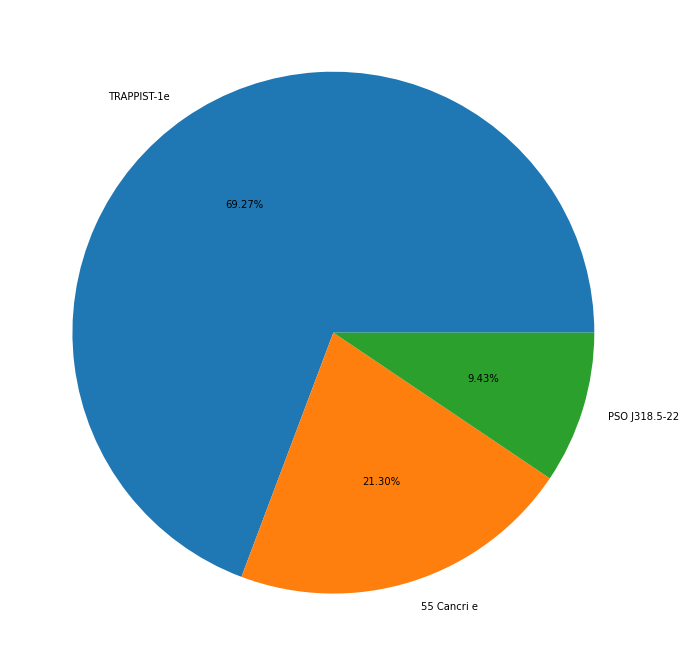

In [123]:

plt.figure(figsize=(15, 12))
plt.pie(
  x = values,
  labels=labels,
  autopct="%.2f%%",
  radius=1,
  center = (0, 150),
  # colors="Set2"
)

**Age Distribution Based on Home Planet**

<AxesSubplot:xlabel='age', ylabel='Density'>

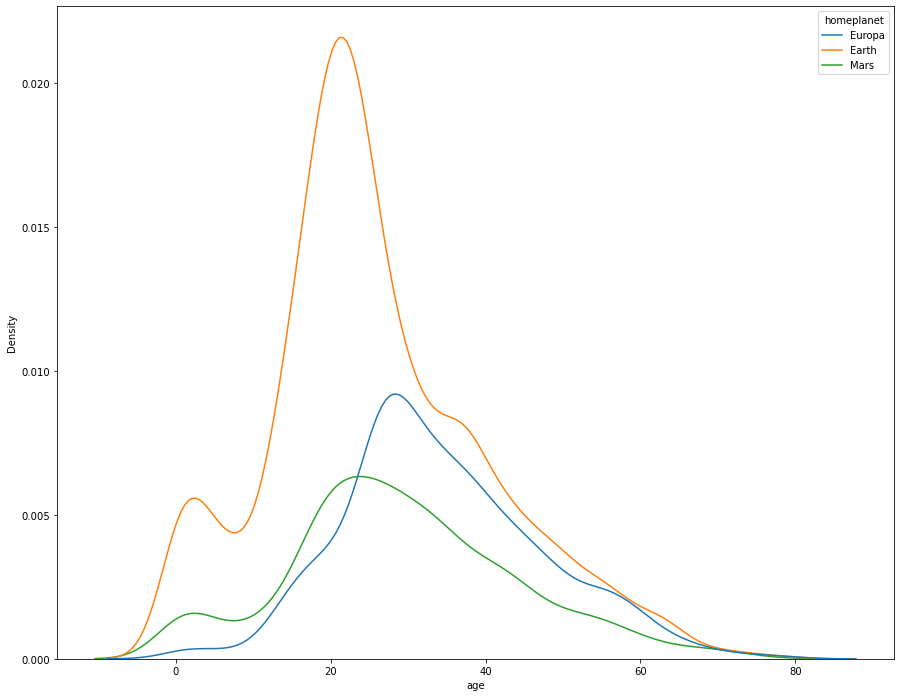

In [124]:
plt.figure(figsize=(15, 12))
sns.kdeplot(
  x = df["age"],
  hue = df["homeplanet"],
)

**Number of people transported based on Home Planet**

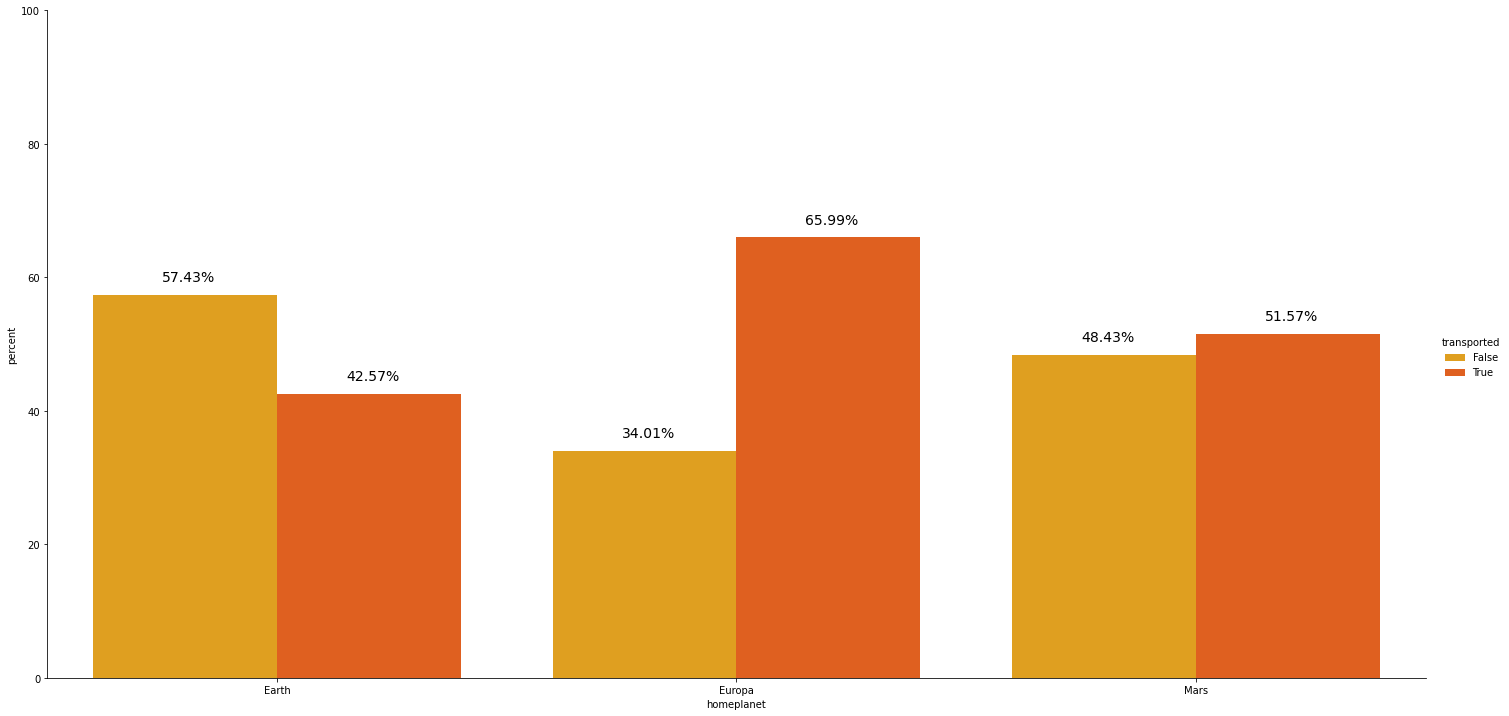

In [125]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("homeplanet")['transported'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'homeplanet',
  y = "percent",
  hue = "transported",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

posx and posy should be finite values
posx and posy should be finite values


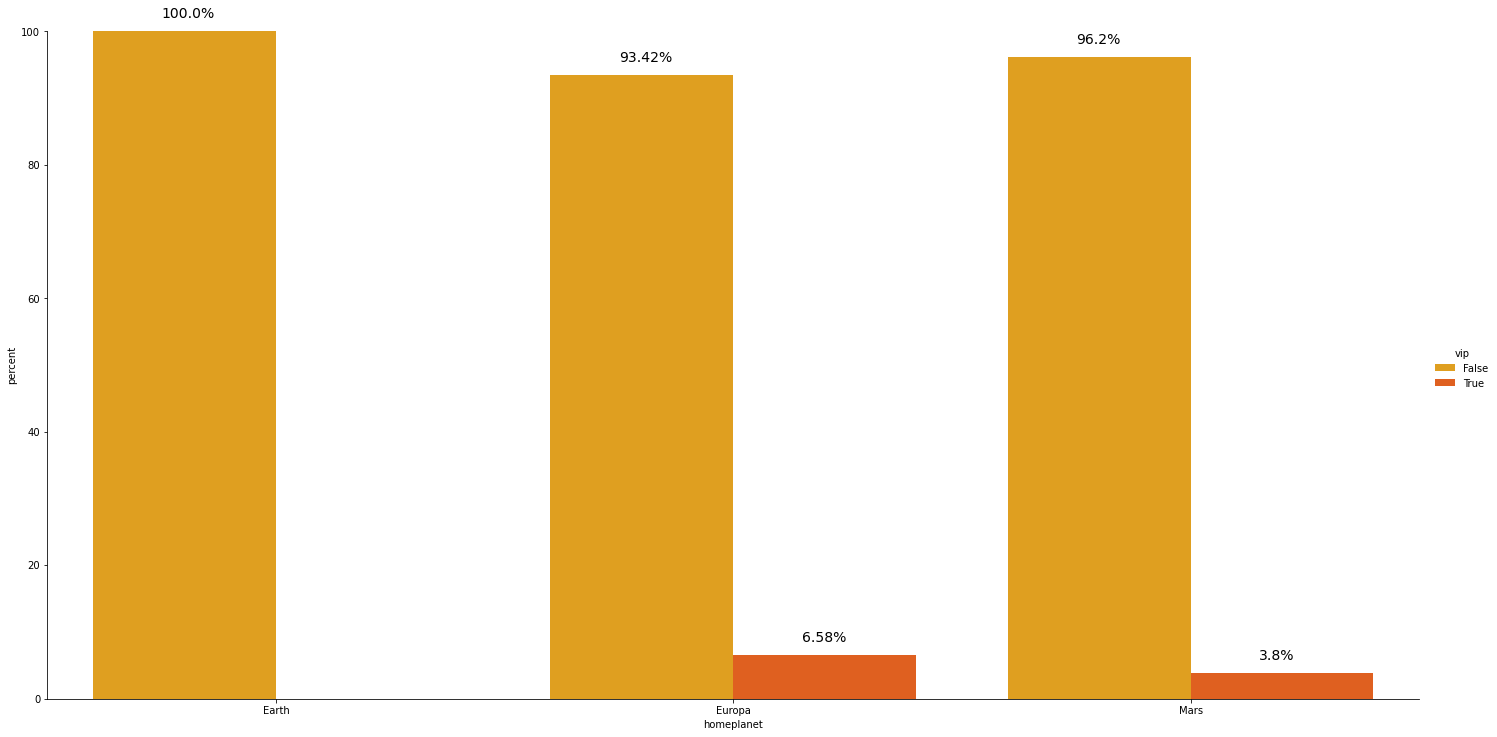

In [126]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("homeplanet")['vip'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'homeplanet',
  y = "percent",
  hue = "vip",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

In [99]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("side")['cryosleep'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'side',
  y = "percent",
  hue = "cryosleep",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

KeyError: 'side'

### Feature Engineering

In [127]:
df['servicecost'] = df['roomservice'] + df['foodcourt'] + df['shoppingmall'] + df['spa'] + df['vrdeck']

In [128]:
group = []
for i in range(len(df)):
  group.append(df['passengerid'].str.split('_')[i][0])

df['group'] = group

In [130]:
deck = []
num = []
side = []

for i in range(len(df)):
  deck.append(df['cabin'].str.split('/')[i][0])
  num.append(df['cabin'].str.split('/')[i][1])
  side.append(df['cabin'].str.split('/')[i][2])


In [131]:
df['deck'], df['side'], df['num'] = deck, side, num

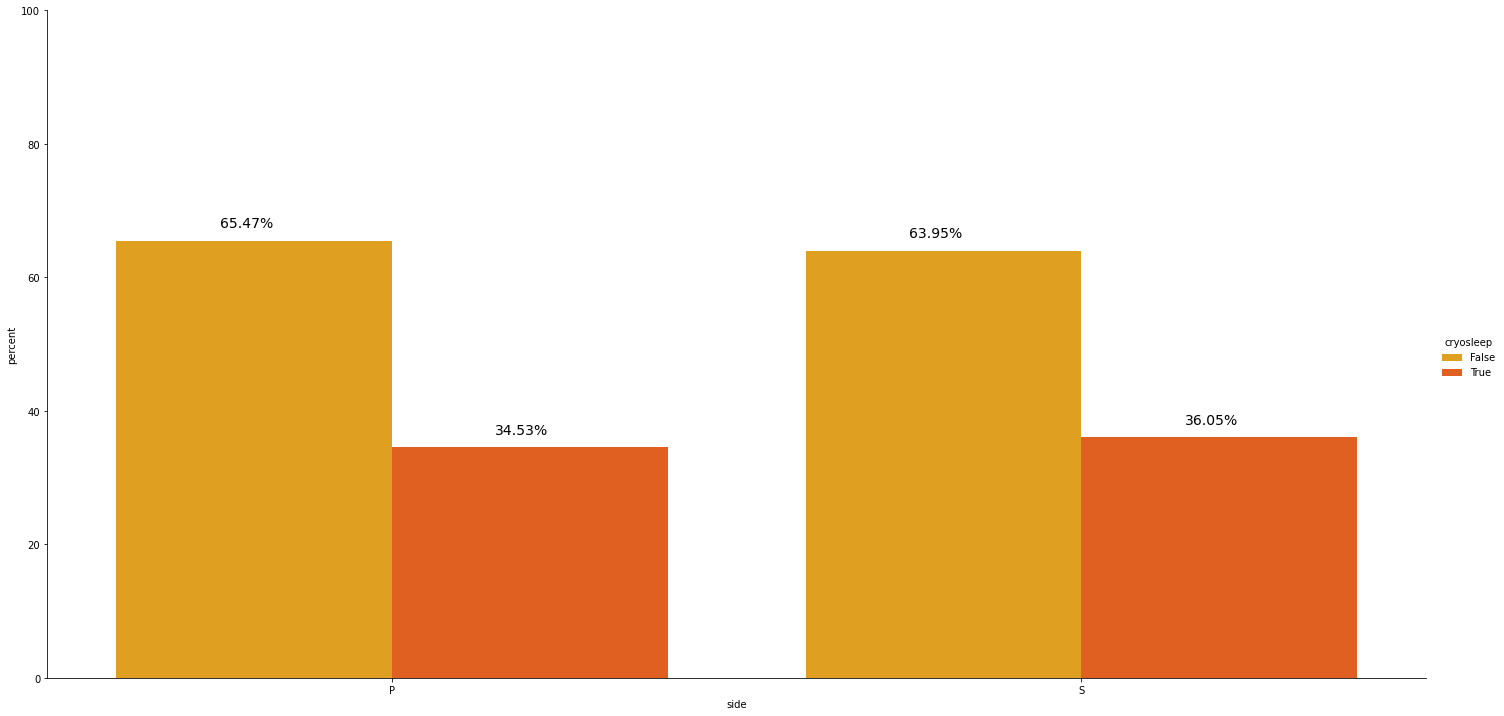

In [132]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("side")['cryosleep'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'side',
  y = "percent",
  hue = "cryosleep",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

posx and posy should be finite values
posx and posy should be finite values


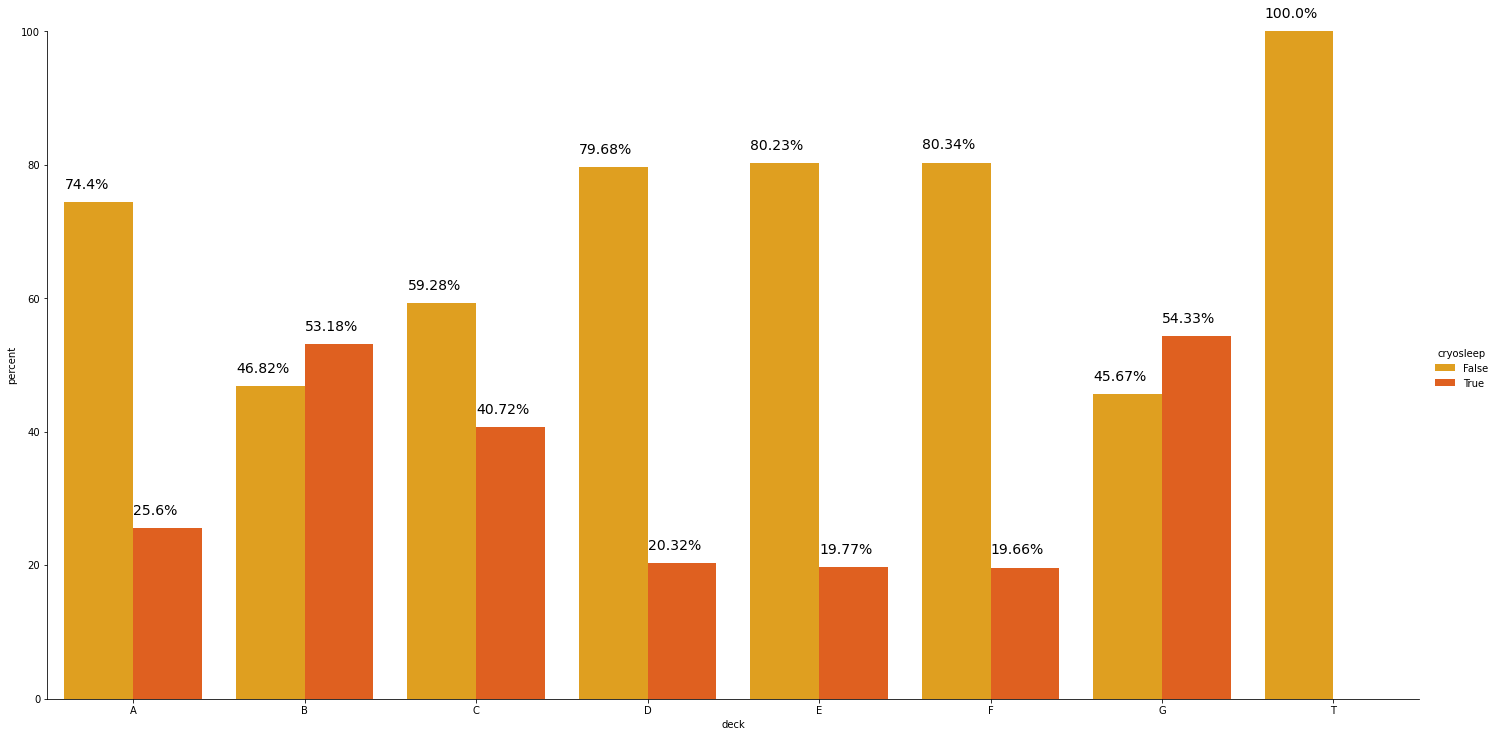

In [134]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("deck")['cryosleep'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'deck',
  y = "percent",
  hue = "cryosleep",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x()
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


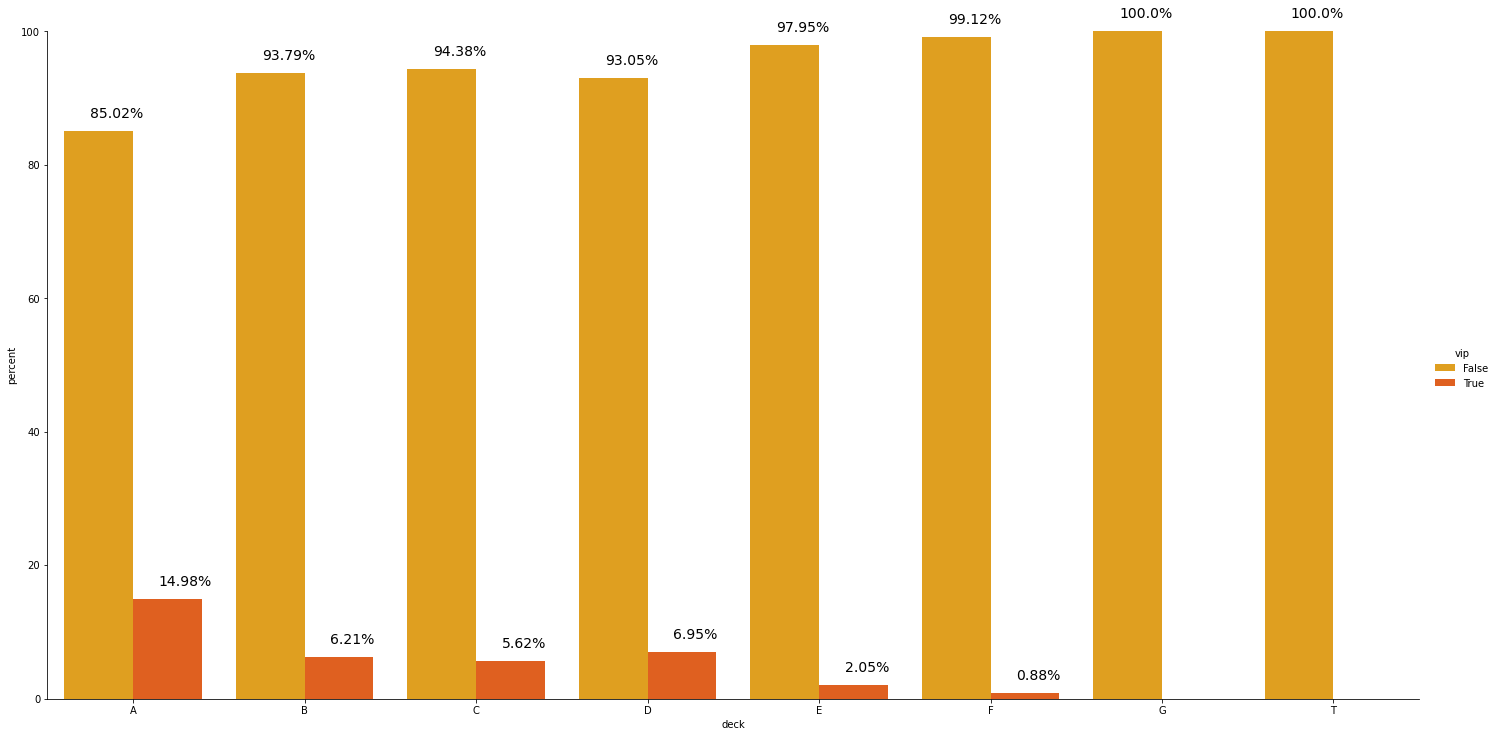

In [136]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("deck")['vip'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'deck',
  y = "percent",
  hue = "vip",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x() + 0.15
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

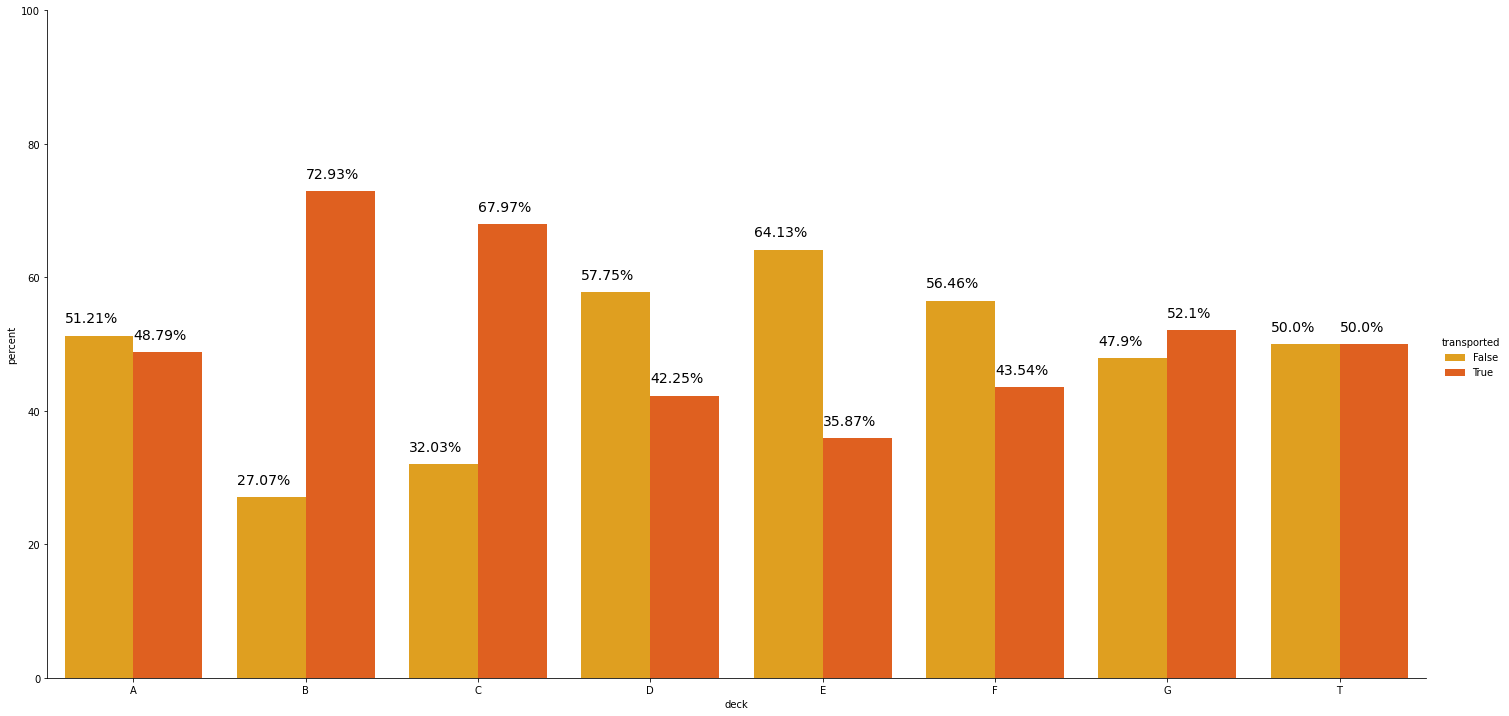

In [138]:
# plt.figure(figsize=(15, 12))

df_plot = df.groupby("deck")['transported'].value_counts(normalize=True)
df_plot = df_plot.mul(100)
df_plot = df_plot.rename("percent").reset_index()
df_plot


g = sns.catplot(
  x = 'deck',
  y = "percent",
  hue = "transported",
  data = df_plot,
  kind='bar',
  height = 10,
  aspect = 2,
  palette="autumn_r"
)
g.ax.set_ylim(0, 100)

for patch in g.ax.patches:
  txt = str(patch.get_height().round(2)) + "%"
  txt_x = patch.get_x()
  txt_y = patch.get_height() + 2
  g.ax.text(txt_x, txt_y, txt, fontsize=14)

In [143]:
df.select_dtypes(include=np.number)


,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,servicecost
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
6601,41.0,0.0,6819.0,0.0,1643.0,74.0,8536.0
6602,18.0,0.0,0.0,0.0,0.0,0.0,0.0
6603,26.0,0.0,0.0,1872.0,1.0,0.0,1873.0
6604,32.0,0.0,1049.0,0.0,353.0,3235.0,4637.0


<AxesSubplot:>

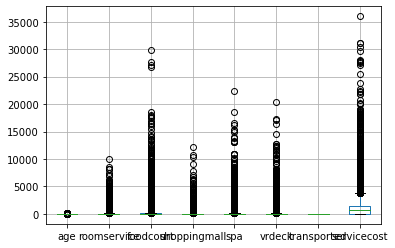

In [144]:
df.boxplot(

)

<AxesSubplot:xlabel='age', ylabel='servicecost'>

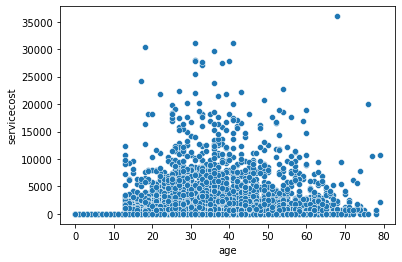

In [94]:
sns.scatterplot(
  x = 'age',
  y = "servicecost",
  data=df
)

In [152]:
deck = []
num = []
side = []

for i in range(len(df)):
  deck.append(df['cabin'].str.split('/')[i][0])
  num.append(df['cabin'].str.split('/')[i][1])
  side.append(df['cabin'].str.split('/')[i][2])


In [153]:
outliers(df.select_dtypes(include=np.number), 2, df.select_dtypes(include=np.number).columns)

age -9.5 66.5
roomservice -73.5 122.5
foodcourt -124.125 206.875
shoppingmall -45.0 75.0
spa -97.5 162.5
vrdeck -78.0 130.0
servicecost -2270.625 3784.375


[]

In [154]:
df

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,servicecost,group,deck,side,num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,F,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9276,A,P,98
6602,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,9278,G,S,1499
6603,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,9279,G,S,1500
6604,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,9280,E,S,608


In [155]:
df.corr()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,servicecost
age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553,0.196001
roomservice,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291,0.224410
foodcourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025,0.753124
shoppingmall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602,0.216893
spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854,0.592827
vrdeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950,0.575334
transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000,-0.190992
servicecost,0.196001,0.224410,0.753124,0.216893,0.592827,0.575334,-0.190992,1.000000


<AxesSubplot:>

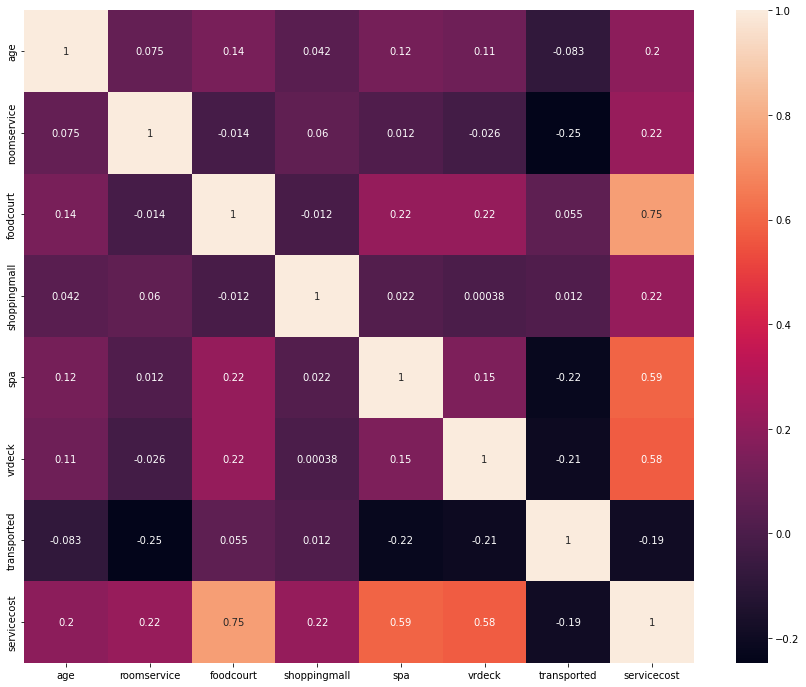

In [157]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True)

In [158]:
from sklearn.preprocessing import LabelEncoder

In [165]:
enc = LabelEncoder()
for col in df.select_dtypes(include=["object", 'bool']):
  df[col] = enc.fit_transform(df[col])

new_df = df.drop(['passengerid', 'cabin'], axis=1)

<AxesSubplot:>

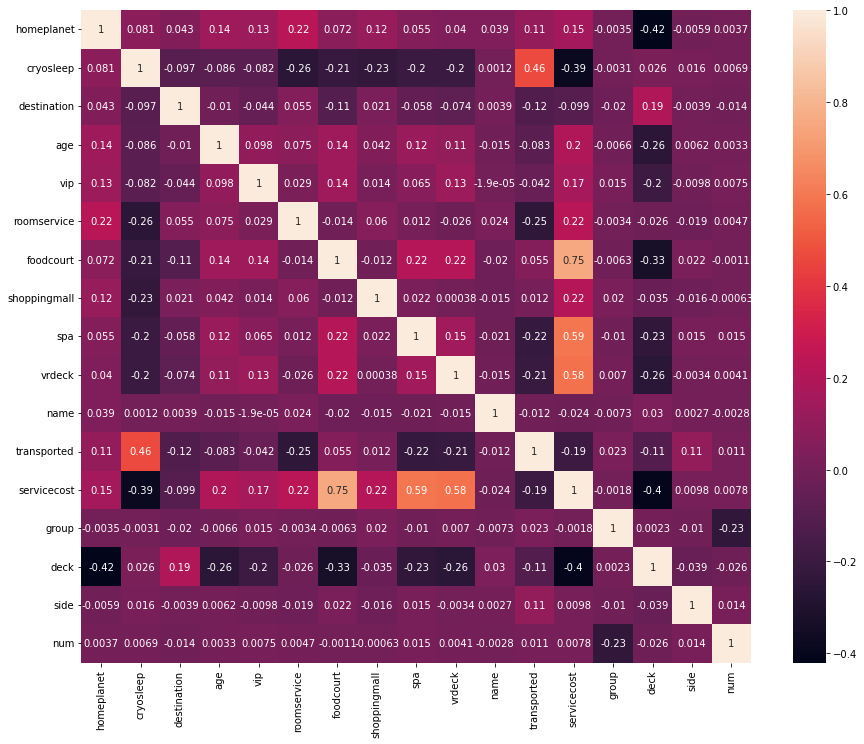

In [169]:
plt.figure(figsize=(15, 12))
sns.heatmap(new_df.corr(), annot=True)

In [173]:
model_df = df.drop(['age', 'vip', 'foodcourt', 'shoppingmall', 'name', 'group', 'side', 'num','passengerid'], axis=1)

In [174]:
model_df

,homeplanet,cryosleep,cabin,destination,roomservice,spa,vrdeck,transported,servicecost,deck
0,1,0,137,2,0.0,0.0,0.0,0,0.0,1
1,0,0,1823,2,109.0,549.0,44.0,1,736.0,5
2,1,0,1,2,43.0,6715.0,49.0,0,10383.0,0
3,1,0,1,2,0.0,3329.0,193.0,0,5176.0,0
4,0,0,1825,2,303.0,565.0,2.0,1,1091.0,5
...,...,...,...,...,...,...,...,...,...,...
6601,1,0,134,0,0.0,1643.0,74.0,0,8536.0,0
6602,0,1,4293,1,0.0,0.0,0.0,0,0.0,6
6603,0,0,4298,2,0.0,1.0,0.0,1,1873.0,6
6604,1,0,1778,0,0.0,353.0,3235.0,0,4637.0,4


In [191]:
df

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,servicecost,group,deck,side,num
0,0,1,0,137,2,39.0,0,0.0,0.0,0.0,0.0,0.0,4080,0,0.0,0,1,0,0
1,1,0,0,1823,2,24.0,0,109.0,9.0,25.0,549.0,44.0,3491,1,736.0,1,5,1,0
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,353,0,10383.0,2,0,1,0
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5536,0,5176.0,2,0,1,0
4,4,0,0,1825,2,16.0,0,303.0,70.0,151.0,565.0,2.0,6464,1,1091.0,3,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,6601,1,0,134,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,2723,0,8536.0,5011,0,0,1712
6602,6602,0,1,4293,1,18.0,0,0.0,0.0,0.0,0.0,0.0,3707,0,0.0,5012,6,1,527
6603,6603,0,0,4298,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,2314,1,1873.0,5013,6,1,530
6604,6604,1,0,1778,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1244,0,4637.0,5014,4,1,1316


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [181]:
X = model_df.drop('transported', axis=1)
y = model_df.transported

In [182]:
X

,homeplanet,cryosleep,cabin,destination,roomservice,spa,vrdeck,servicecost,deck
0,1,0,137,2,0.0,0.0,0.0,0.0,1
1,0,0,1823,2,109.0,549.0,44.0,736.0,5
2,1,0,1,2,43.0,6715.0,49.0,10383.0,0
3,1,0,1,2,0.0,3329.0,193.0,5176.0,0
4,0,0,1825,2,303.0,565.0,2.0,1091.0,5
...,...,...,...,...,...,...,...,...,...
6601,1,0,134,0,0.0,1643.0,74.0,8536.0,0
6602,0,1,4293,1,0.0,0.0,0.0,0.0,6
6603,0,0,4298,2,0.0,1.0,0.0,1873.0,6
6604,1,0,1778,0,0.0,353.0,3235.0,4637.0,4


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [184]:
log = LogisticRegression()
log.fit(X_train, y_train)

/home/xviix/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
accuracy_score(y_test, log.predict(X_test))

0.7821482602118003

In [187]:
X = df.drop('transported', axis=1)
y = df.transported

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [189]:
log = LogisticRegression()
log.fit(X_train, y_train)

/home/xviix/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [190]:
accuracy_score(y_test, log.predict(X_test))

0.7602118003025718